In [1]:
from matplotlib import *
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import clear_output

In [2]:
def grid_generator(row,col):     # function to create the matrix
    grid =[]
    open_pos=[]
    for i in range(row):
        temp=[]
        for j in range(col):
            temp.append(state(i,j))           # function calls state class
            if numpy.random.randint(5)==3:
                temp[-1].type=1
                temp[-1].dis ='#'             # obstacle 
            else:
                temp[-1].dis='.'              # open cell
                open_pos.append([temp[-1].x,temp[-1].y])
        grid.append(temp)
    return grid,open_pos

def grid_print(grid):                         # Not in use
    
    for i in range(len(grid)):
        for j in range(len(grid[i])):
            print(grid[i][j].dis,end="")
        print('\n')

In [3]:
class state():                     # Cell object creation
    
    def __init__(self,i,j):                               
        self.x =i                     # cell row
        self.y =j                     # cell col
        self.type =0                  # cell type 0 /1 to identify obstacle
        self.dis =None                # help the printer function to identify the cell type
        self.parent = 7               # stores parent of the cell
        self.heuristic =0             # eucledian heuristic


        
class BFS():                                  # BFS algorithm class
    
    def __init__(self,start):                    # BFS queue creator
        self.queue=[]
    
    
    def isempty(self):                           # check if queue is empty
        if len(self.queue)==0:
            return True
        else:
            return False
    
    def remove(self):                            # removes the state from the queue
        if self.isempty():
            print('Queue Error')
        else:
            return self.queue.pop(0)
        
    def add(self,state):                         # adds new state to the queue at end
        self.queue.append(state)
        
    
class DFS():                                     # DFS algorithm
    
    def __init__(self,start):                    # hybrid stack - implementd with list
        self.stack=[]
    
    def isempty(self):
        if len(self.stack)==0:
            print('Stack is empty')
            return True
        else:
            return False
    
    def remove(self):
        if self.isempty():                     # removes from top
            print('Queue Error')
        else:
            return self.stack.pop(0)
        
    def add(self,state):                       #adds at top
        self.stack.insert(0,state)
        

class heuristic():                             # heuristic algorithm
    
    def __init__(self,end):
        self.queue=[]
        self.end =end
    
    def isempty(self):
        if len(self.queue)==0:
            return True
        else:
            return False
    
    def remove(self):
        if self.isempty():
            print('Queue Error')
        else:
            return self.queue.pop(0)
        
    def add(self,state):                      # eucledian distance heuristic
        self.queue.append(state)
        state.heuristic = ((state.x -self.end.x)**2 + (state.y-self.end.y)**2)**0.5
        self.sorter()
        
    def sorter(self):                       # to sort the queue with the heuristic
        while swap!=0:
            swap=0
            for i in range(len(self.queue)):
                if self.queue[i+1].heuristic<self.queue[i].heuristic:
                    temp =  self.queue[i+1]
                    self.queue[i+1] =self.queue[i]
                    self.queue[i] = temp
                    swap+=1
                
                          
class search():                             # search algorithm to call DFS / BFS/ Heurisitc                           
    
    def __init__(self,start,goal,grid,stype):
        self.start =start
        self.goal =goal
        self.grid=grid
        self.stype =stype
        
    
    def findneighbour(self,state):         # find the eight close neightbours of state
        neigh =[]
        neigh=[[state.x,state.y-1],[state.x,state.y+1]]
        neigh.append([state.x+1,state.y])
        neigh.append([state.x-1,state.y])
        neigh.append([state.x+1,state.y+1])
        neigh.append([state.x-1,state.y-1])
        neigh.append([state.x-1,state.y+1])
        neigh.append([state.x+1,state.y-1])
        return neigh
        
        
    
    def run(self):                       # initiates the search
        
        if self.stype =='BFS':
            fs=BFS(self.grid[self.start[0]][self.start[1]])
        elif self.stype=='DFS':
            fs=DFS(self.grid[self.start[0]][self.start[1]])
        elif self.stype =='He':
            fs=DFS(self.grid[self.goal[0]][self.goal[1]])
        
        self.process(fs)
    def process(self,fs):               # starts the process
        explored =[]
        exploration =0
        fs.add(self.grid[self.start[0]][self.start[1]])
        
        current =fs.remove()
        counter=0
        while current != self.grid[self.goal[0]][self.goal[1]] and counter!=(N*N)*8:
            neigh = self.findneighbour(current)
            for i in neigh:
                if i[0]>=0 and i[0]<=len(self.grid)-1 and i[1]>=0 and i[1]<=len(self.grid)-1 and  i not in explored:
                    if self.grid[i[0]][i[1]].type==0:
                        fs.add(self.grid[i[0]][i[1]])
                        self.grid[i[0]][i[1]].parent=current
                        explored.append(i)
            current = fs.remove()
            counter+=1
            exploration+=1
        if current==self.grid[self.goal[0]][self.goal[1]]:
            print('Goal found')
            current.dis='G'
            while current!=self.grid[self.start[0]][self.start[1]]:
                    
                print(current.x,current.y)
                current = current.parent
                current.dis='+'
            current.dis='S'   
            gridprint(g1,len(g1))
            print('RED - Obstacle ','Blue -path ','Start -Black ','Goal- Green')
            print('Exploration',exploration,' for ',self.stype,' algorithm')
        else:
            print('goal not found , unable to move around')

In [4]:
def gridprint(g,N):            #  printer function takes in the grid and the size of grid           

    data=[]
    for i in range(len(g)):
        temp=[]
        for j in range(len(g[i])):
            if g[i][j].dis=='#':
                temp.append(4)
            elif g[i][j].dis=='+':
                temp.append(9)
            elif g[i][j].dis=='S':
                temp.append(19)
            elif g[i][j].dis=='G':
                temp.append(24)
            else:
                temp.append(14)
        data.append(temp)

    # create discrete colorm
    cmap = colors.ListedColormap(['r','b','w','black','g'])
    bounds = [0,5,10,15,20,25]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    cmap.set_bad(color='w',alpha=0)
    cmap
    fig, ax = plt.subplots()
    ax.imshow(data, cmap=cmap, norm=norm)

    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(0.5, N, 1));
    ax.set_yticks(np.arange(0.5, N, 1));
    
    
    plt.show()

## Maze Solver via Motion Planning

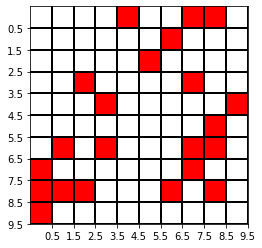

In [5]:
N = 10
g,o=grid_generator(N,N)
gridprint(g,N)

In [6]:
print('Do you want system to select the start and goal')

user2 = widgets.Dropdown(
    options = [("Yes", "Y"), ("No", "N")],
    disabled = False,
)
display(user2)

print('Provide the start position')
start_options = []
for idx, option in enumerate(o):
    start_options.append((option, idx))
start_choice = widgets.Dropdown(
    options=start_options,
    disabled = False,
)
display(start_choice)
    
print('Provide the goal position')
goal_options = []
for idx, option in enumerate(o):
    goal_options.append((option, idx))
goal_choice = widgets.Dropdown(
    options = goal_options,
    disabled = False,
)
display(goal_choice)

class sam():
    
    def __init__(self):
        self.start=None
        self.goal=None

s = sam()

Do you want system to select the start and goal


Dropdown(options=(('Yes', 'Y'), ('No', 'N')), value='Y')

Provide the start position


Dropdown(options=(([0, 0], 0), ([0, 1], 1), ([0, 2], 2), ([0, 3], 3), ([0, 5], 4), ([0, 6], 5), ([0, 9], 6), (…

Provide the goal position


Dropdown(options=(([0, 0], 0), ([0, 1], 1), ([0, 2], 2), ([0, 3], 3), ([0, 5], 4), ([0, 6], 5), ([0, 9], 6), (…

In [7]:
global start
global goal
message = widgets.Output()
button_set_start_and_goal_state = widgets.Button(description="Set Start and Goal State")

def on_button_set_start_and_goal_state(b):

    if user2.value=='Y':
        start = o[numpy.random.randint(len(o))]
        goal  = o[numpy.random.randint(len(o))]
        while start == goal:
            start = o[numpy.random.randint(len(o))]
            goal  = o[numpy.random.randint(len(o))]
    else:
        start = o[start_choice.value]
        goal  = o[goal_choice.value]
        
   
    
    with message:
        clear_output(True)
        print(start)
        print(goal)
    s.start=start
    s.goal=goal
             
button_set_start_and_goal_state.on_click(on_button_set_start_and_goal_state)

In [8]:
display(button_set_start_and_goal_state)
display(message)

Button(description='Set Start and Goal State', style=ButtonStyle())

Output()

In [9]:
print('Select Algorithm(BFS/DFS/He)')
user3 = widgets.Dropdown(
    options = [('BFS', 'BFS'), ('DFS', 'DFS'), ('Heuristics Search', 'He')],
    disabled = False,
)
display(user3)

Select Algorithm(BFS/DFS/He)


Dropdown(options=(('BFS', 'BFS'), ('DFS', 'DFS'), ('Heuristics Search', 'He')), value='BFS')

In [10]:
result = widgets.Output()

button_search = widgets.Button(description="Search")

g1 = g.copy()

def on_button_search(b):
    start=s.start
    goal=s.goal
    sr = search(start,goal,g1,user3.value)
    
    with result:
        clear_output(True)
        sr.run()
            
button_search.on_click(on_button_search)

In [11]:
display(button_search)
display(result)

Button(description='Search', style=ButtonStyle())

Output()